In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
import optuna
import datetime as dt
import hashlib
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

c:\Users\MEHMET\Desktop\fraud_detection\fraudenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv("datasets/frauddata.csv")
df.iloc[:, 1:]

,cc_num,first,last,gender,city,state,zip,city_pop,job,dob,acct_num,trans_num,trans_date,trans_time,unix_time,category,amt,is_fraud,merchant
0,4361337605230458,Kristie,Davis,F,Chandler,OK,74834,7590,Chief Strategy Officer,1987-06-12,349734538563,c036244703adb9d5392f4027d9d4b38d,2021-07-31,02:30:01,1627678801,grocery_pos,337.54,1,fraud_Kovacek
1,4361337605230458,Kristie,Davis,F,Chandler,OK,74834,7590,Chief Strategy Officer,1987-06-12,349734538563,42f000b0b3b0ef534e5b8ef9ec1db13a,2021-08-01,22:37:41,1627837661,personal_care,21.13,1,fraud_Bradtke
2,4361337605230458,Kristie,Davis,F,Chandler,OK,74834,7590,Chief Strategy Officer,1987-06-12,349734538563,543037b1baf088961e58d00b705f4bcc,2021-08-01,23:02:09,1627839129,personal_care,22.61,1,fraud_Kozey-Kuhlman
3,4361337605230458,Kristie,Davis,F,Chandler,OK,74834,7590,Chief Strategy Officer,1987-06-12,349734538563,00a4e08643edebf9277c2967676f6a26,2021-08-01,22:27:24,1627837044,health_fitness,17.32,1,fraud_Hills
4,4361337605230458,Kristie,Davis,F,Chandler,OK,74834,7590,Chief Strategy Officer,1987-06-12,349734538563,492c4412815306718f686fc5b459a285,2021-12-02,02:28:51,1638392331,misc_pos,75.82,0,fraud_Kemmer-Buckridge
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2646689,4888818930461631,Kristen,Wilson,F,Pleasant Garden,NC,27313,6962,Museum/gallery curator,1969-09-14,834942757900,b2d8cfd9502a982b910edeea05baebe8,2023-06-02,22:05:19,1685723719,kids_pets,5.10,0,fraud_Cartwright PLC
2646690,4888818930461631,Kristen,Wilson,F,Pleasant Garden,NC,27313,6962,Museum/gallery curator,1969-09-14,834942757900,b688d8f1f21483947654a25891dd80fe,2023-07-27,12:19:49,1690440589,kids_pets,7.05,0,fraud_Waelchi Inc
2646691,4888818930461631,Kristen,Wilson,F,Pleasant Garden,NC,27313,6962,Museum/gallery curator,1969-09-14,834942757900,f12b8b2933bb5280f4e8f41dd8d91295,2023-10-13,20:40:24,1697209824,personal_care,2.31,0,fraud_Emmerich-Rau
2646692,4888818930461631,Kristen,Wilson,F,Pleasant Garden,NC,27313,6962,Museum/gallery curator,1969-09-14,834942757900,b243e1332abfcd5735cb0631e2fcc168,2023-05-19,19:03:38,1684503218,home,8.35,0,fraud_Renner Ltd


In [3]:
def hash_ssn(ssn):
    return hashlib.sha256(ssn.encode()).hexdigest()

df['hashed_ssn'] = df['ssn'].apply(hash_ssn)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2646694 entries, 0 to 2646693
Data columns (total 21 columns):
 #   Column      Dtype  
---  ------      -----  
 0   ssn         object 
 1   cc_num      int64  
 2   first       object 
 3   last        object 
 4   gender      object 
 5   city        object 
 6   state       object 
 7   zip         int64  
 8   city_pop    int64  
 9   job         object 
 10  dob         object 
 11  acct_num    int64  
 12  trans_num   object 
 13  trans_date  object 
 14  trans_time  object 
 15  unix_time   int64  
 16  category    object 
 17  amt         float64
 18  is_fraud    int64  
 19  merchant    object 
 20  hashed_ssn  object 
dtypes: float64(1), int64(6), object(14)
memory usage: 424.0+ MB


In [5]:
df.drop(columns=["trans_date","trans_time","unix_time","trans_num","dob","city_pop","zip","ssn","city","acct_num","cc_num"], inplace=True)

In [6]:
df

,first,last,gender,state,job,category,amt,is_fraud,merchant,hashed_ssn
0,Kristie,Davis,F,OK,Chief Strategy Officer,grocery_pos,337.54,1,fraud_Kovacek,b259f8bf3af3ae5794de5295bbe43bce4964135a9748e5...
1,Kristie,Davis,F,OK,Chief Strategy Officer,personal_care,21.13,1,fraud_Bradtke,b259f8bf3af3ae5794de5295bbe43bce4964135a9748e5...
2,Kristie,Davis,F,OK,Chief Strategy Officer,personal_care,22.61,1,fraud_Kozey-Kuhlman,b259f8bf3af3ae5794de5295bbe43bce4964135a9748e5...
3,Kristie,Davis,F,OK,Chief Strategy Officer,health_fitness,17.32,1,fraud_Hills,b259f8bf3af3ae5794de5295bbe43bce4964135a9748e5...
4,Kristie,Davis,F,OK,Chief Strategy Officer,misc_pos,75.82,0,fraud_Kemmer-Buckridge,b259f8bf3af3ae5794de5295bbe43bce4964135a9748e5...
...,...,...,...,...,...,...,...,...,...,...
2646689,Kristen,Wilson,F,NC,Museum/gallery curator,kids_pets,5.10,0,fraud_Cartwright PLC,eaabd2b800f35ebc8b9985549d4b79a276ac9920f03ded...
2646690,Kristen,Wilson,F,NC,Museum/gallery curator,kids_pets,7.05,0,fraud_Waelchi Inc,eaabd2b800f35ebc8b9985549d4b79a276ac9920f03ded...
2646691,Kristen,Wilson,F,NC,Museum/gallery curator,personal_care,2.31,0,fraud_Emmerich-Rau,eaabd2b800f35ebc8b9985549d4b79a276ac9920f03ded...
2646692,Kristen,Wilson,F,NC,Museum/gallery curator,home,8.35,0,fraud_Renner Ltd,eaabd2b800f35ebc8b9985549d4b79a276ac9920f03ded...


In [7]:
labelencoder = LabelEncoder()
df["gender"] = labelencoder.fit_transform(df["gender"])

In [8]:
df.set_index("hashed_ssn",drop=True, inplace=True)

In [9]:
cat_cols = ["state","job","category","merchant"]

In [10]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [11]:
df = one_hot_encoder(df, cat_cols)

In [12]:
df.drop(columns=["first","last"], inplace=True)

In [13]:
train_len = int(np.round(len(df) * 0.8))
print(train_len)

2117355


In [14]:
train, test = df[:train_len], df[train_len:]
print(train.shape, test.shape)

(2117355, 1132) (529339, 1132)


In [15]:
X_train = train.drop(columns=["is_fraud"])
X_test = test.drop(columns=["is_fraud"])

y_train = train["is_fraud"]
y_test = test["is_fraud"]

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2117355, 1131) (529339, 1131) (2117355,) (529339,)


In [16]:
log_model = LogisticRegression()

log_model.fit(X_train,y_train)

LogisticRegression()

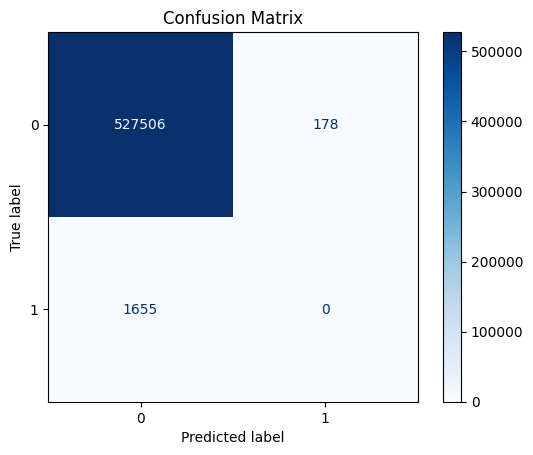

In [17]:
y_pred = log_model.predict(X_test)
y_true = y_test

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

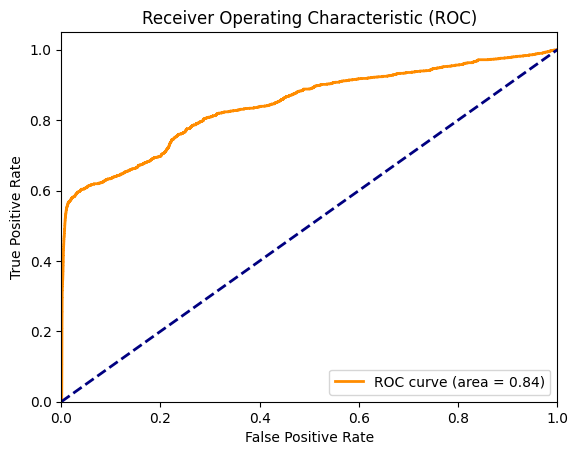

In [18]:
n_classes = 2


y_test_binarized = label_binarize(y_test, classes=[0, 1])


y_score = log_model.predict_proba(X_test)


fpr, tpr, _ = roc_curve(y_test_binarized[:, 0], y_score[:, 1])
roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC curve (area = {roc_auc:.2f})')


plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [19]:
cross_val_score(log_model,
                X_train,
                y_train,
                scoring="f1_macro",
                cv=5).mean()

c:\Users\MEHMET\Desktop\fraud_detection\fraudenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\MEHMET\Desktop\fraud_detection\fraudenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

np.float64(0.49901653753765307)

In [20]:
lgbm_model = LGBMClassifier().fit(X_train,y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 7767, number of negative: 2109588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009758 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2447
[LightGBM] [Info] Number of data points in the train set: 2117355, number of used features: 1097
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.003668 -> initscore=-5.604364
[LightGBM] [Info] Start training from score -5.604364


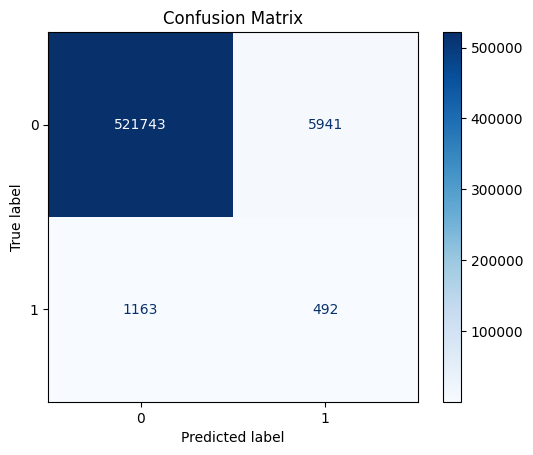

In [21]:
y_pred = lgbm_model.predict(X_test)
y_true = y_test

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

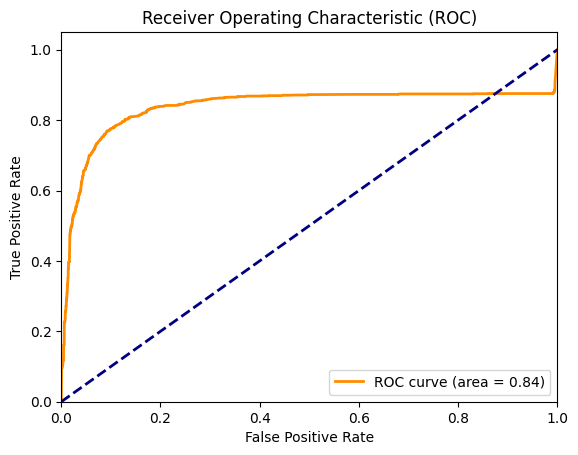

In [22]:
n_classes = 2


y_test_binarized = label_binarize(y_test, classes=[0, 1])


y_score = lgbm_model.predict_proba(X_test)


fpr, tpr, _ = roc_curve(y_test_binarized[:, 0], y_score[:, 1])
roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC curve (area = {roc_auc:.2f})')


plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [23]:
acc = accuracy_score(y_pred, y_true)
print(f"Accuracy: {acc}")

Accuracy: 0.9865794887586216


In [24]:
precision = precision_score(y_pred, y_true)
print(f"Precision: {precision}")

Precision: 0.2972809667673716


In [25]:
recall = recall_score(y_pred, y_true)
print(f"Recall: {recall}")

Recall: 0.07648064666563034


In [26]:
f1 = f1_score(y_pred, y_true)
print(f"F1: {f1}")

F1: 0.12166172106824925


In [27]:
cl_report = classification_report(y_pred, y_true)
print(cl_report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    522906
           1       0.30      0.08      0.12      6433

    accuracy                           0.99    529339
   macro avg       0.64      0.54      0.56    529339
weighted avg       0.98      0.99      0.98    529339



In [28]:
cross_val_score(lgbm_model,
                X_train,
                y_train,
                scoring="f1_macro",
                cv=5).mean()

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 6213, number of negative: 1687671
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006333 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2355
[LightGBM] [Info] Number of data points in the train set: 1693884, number of used features: 1051
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.003668 -> initscore=-5.604461
[LightGBM] [Info] Start training from score -5.604461
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 6213, number of negative: 1687671
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008255 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `f

np.float64(0.5442773309809925)

In [29]:
from sklearn.model_selection import train_test_split

X_train_sample, ttest_x, y_train_sample, ttest_y = train_test_split(X_train, y_train, test_size=0.6, random_state=42)

In [30]:
smote = SMOTE(sampling_strategy="auto", k_neighbors=3)

X_resampled, y_resampled = smote.fit_resample(X_train_sample, y_train_sample)

In [31]:
cross_val_score(lgbm_model,
                X_resampled,
                y_resampled,
                scoring="f1_macro",
                cv=5).mean()

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 675109, number of negative: 675108
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.859069 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2459
[LightGBM] [Info] Number of data points in the train set: 1350217, number of used features: 1103
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000001
[LightGBM] [Info] Start training from score 0.000001
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 675108, number of negative: 675109
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.891103 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `f

np.float64(0.9857218492787343)

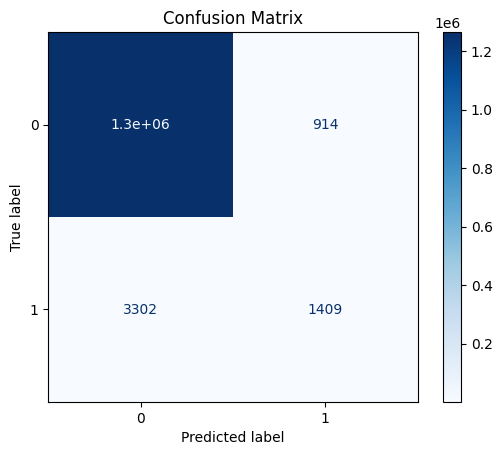

In [32]:
y_pred = lgbm_model.predict(ttest_x)
y_true = ttest_y

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lgbm_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

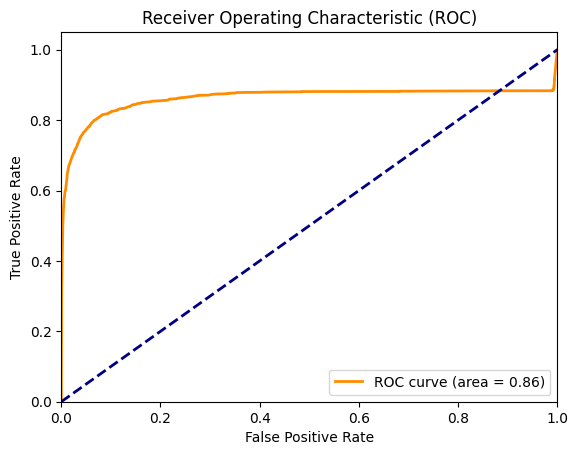

In [33]:
n_classes = 2


y_test_binarized = label_binarize(ttest_y, classes=[0, 1])


y_score = lgbm_model.predict_proba(ttest_x)


fpr, tpr, _ = roc_curve(y_test_binarized[:, 0], y_score[:, 1])
roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC curve (area = {roc_auc:.2f})')


plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [34]:
acc = accuracy_score(y_pred, y_true)
print(f"Accuracy: {acc}")

Accuracy: 0.9966813941607965


In [35]:
precision = precision_score(y_pred, y_true)
print(f"Precision: {precision}")

Precision: 0.2990872426236468


In [36]:
recall = recall_score(y_pred, y_true)
print(f"Recall: {recall}")

Recall: 0.6065432630219544


In [37]:
f1 = f1_score(y_pred, y_true)
print(f"F1: {f1}")

F1: 0.4006255331248223


In [38]:
cl_report = classification_report(y_pred, y_true)
print(cl_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1268090
           1       0.30      0.61      0.40      2323

    accuracy                           1.00   1270413
   macro avg       0.65      0.80      0.70   1270413
weighted avg       1.00      1.00      1.00   1270413

